# TESTE T PARA UMA AMOSTRA

### Hipótese: média das notas do colégio Y é igual ao do estado de São Paulo

# 0.0 Importações

## 0.1 Bibliotecas

In [1]:
library(nortest)
library(dplyr)
library(rstatix)
library(ggplot2)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'rstatix'


The following object is masked from 'package:stats':

    filter




## 0.2 Dataset

In [2]:
enem2019_tratado <- read.csv('data/enem2019_tratado.csv', sep=",")

In [3]:
head(enem2019_tratado)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,TP_ENSINO,CO_ESCOLA,TP_PRESENCA_CN,⋯,NOTA_LC,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NOTA_COMP1,NOTA_COMP2,NOTA_COMP3,NOTA_COMP4,NOTA_COMP5,NOTA_REDACAO
,<dbl>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,190001017053,Santa Isabel,22,M,3,1,1,1,NA,1,⋯,592.9,600.2,0,1,160,200,180,200,200,940
2,190001019850,São Paulo,17,F,3,1,3,1,15567761,1,⋯,634.3,731.8,0,1,160,120,200,200,200,880
3,190001024874,São Bernardo do Campo,19,M,3,1,2,1,35904958,1,⋯,509.6,393.2,1,1,80,160,120,100,100,560
4,190001031050,Embu-Guaçu,17,F,3,1,2,1,NA,1,⋯,487.2,419.2,0,1,120,120,120,120,80,560
5,190001045429,Guarulhos,23,F,1,1,1,NA,NA,1,⋯,629.3,796.1,0,1,160,200,180,180,160,880
6,190001050482,São José do Rio Preto,18,F,1,1,2,1,35028927,1,⋯,555.9,612.8,1,1,120,160,120,80,100,580


In [4]:
# filtrando colégio

colegioy <- enem2019_tratado %>% filter(CO_ESCOLA=="35151506")

In [5]:
nrow(colegioy)

[1] 30

# 1.0 Testes Estatísticos

## 1.1 Teste de normalidade

Nível de significância de 5%

- Ho = distribuição normal : p > 0.05
- Ha = distribuição não normal : p <= 0.05

In [6]:
# shapiro-wilk

shapiro.test(colegioy$NOTA_CH)


	Shapiro-Wilk normality test

data:  colegioy$NOTA_CH
W = 0.9771, p-value = 0.7445


In [7]:
# anderson-darling

ad.test(colegioy$NOTA_CH)


	Anderson-Darling normality test

data:  colegioy$NOTA_CH
A = 0.21711, p-value = 0.8269


In [8]:
# lilliefors / kolmogorov-smirnov

lillie.test(colegioy$NOTA_CH)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  colegioy$NOTA_CH
D = 0.092274, p-value = 0.7408


In [9]:
# cramer-von mises

cvm.test(colegioy$NOTA_CH)


	Cramer-von Mises normality test

data:  colegioy$NOTA_CH
W = 0.02566, p-value = 0.8954


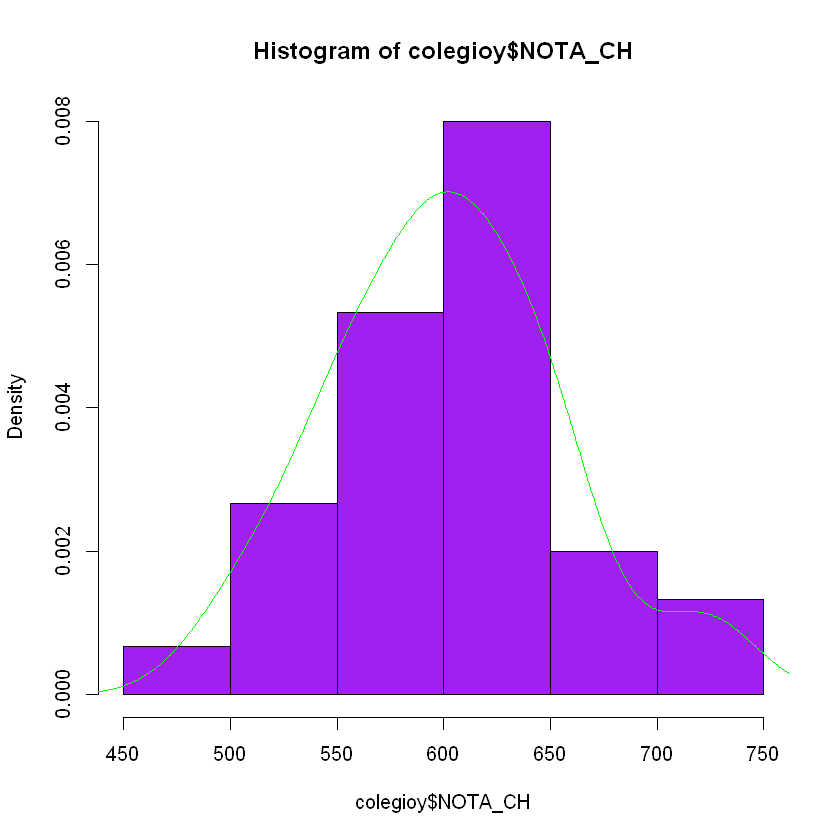

In [10]:
# histograma

hist(colegioy$NOTA_CH, probability=T, col="purple")
lines(density(colegioy$NOTA_CH), col="green")

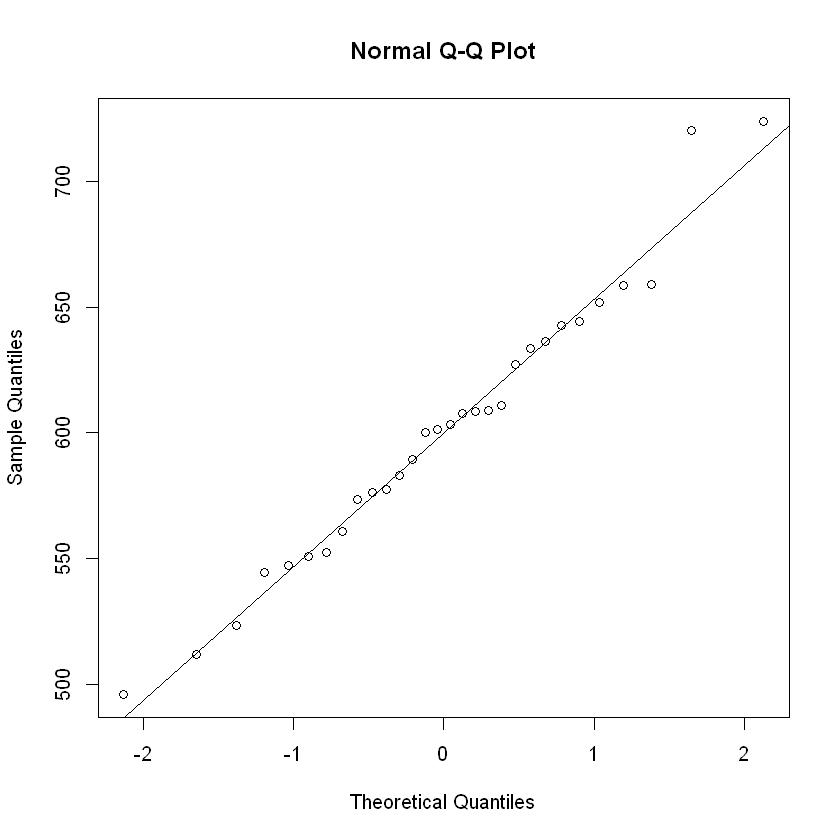

In [11]:
# qqplot

qqnorm(colegioy$NOTA_CH)
qqline(colegioy$NOTA_CH)

## 1.2 Teste T

- Ho = média é igual a de São Paulo : p > 0.05
- Ha = média é diferente da de São Paulo : p <= 0.05

In [12]:
media <- mean(enem2019_tratado$NOTA_CH)
media

[1] 529.6145

In [13]:
t.test(colegioy$NOTA_CH, mu=media)


	One Sample t-test

data:  colegioy$NOTA_CH
t = 7.1806, df = 29, p-value = 6.641e-08
alternative hypothesis: true mean is not equal to 529.6145
95 percent confidence interval:
 580.5341 621.0926
sample estimates:
mean of x 
 600.8133 


**Conclusão**: A média do colégio Y é diferente da média do estado de São Paulo.